In [2]:
import torch
import numpy as np
import os


In [1]:
def printScore(file):
    directory = '/home/thire399/Documents/School/DC-MasterThesis-2023/Data/Loss_chest_xray/'
    os.chdir(directory)
    train = torch.load('train_loss' + file + '.pt').tolist()
    val = torch.load('val_loss' + file + '.pt').tolist()
    print('min train accuracy {0}\nmin val accuracy   {1}\nAfter {2} epochs'.format(
                    np.round(1-min(train),3 ),
                    np.round(1-min(val), 3),
                    val.index(min(val))))
    return None

# Captum

In [23]:
import captum.attr
import captum
import os
import torch
from captum.attr import visualization as viz
import matplotlib.pyplot as plt
from torchvision import models
import Models as M
import gc
import torch.nn as nn
os.chdir('/home/thire399/Documents/School/DC-MasterThesis-2023')
#del model 
gc.collect()
gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if gpu else "cpu")
print("device:", device)
dataSet = 'chest_xray'

#model = models.alexnet(pretrained = False)
#model.classifier[6] = nn.Linear(in_features=4096, out_features = 2, bias=True)
model = models.resnet101(pretrained = False)
model.fc = nn.Linear(in_features = 2048, out_features = 1, bias=True)
model.load_state_dict(torch.load(f'Data/Loss_chest_xray/model256x256FullResNet20230415-183007'))
data = torch.load(f'Data/Proccesed/{dataSet}/trainX.pt')
y = torch.load(f'Data/Proccesed/{dataSet}/trainY.pt')
model.to(device)
model.eval()
DeepLift = captum.attr.DeepLift(model)
input1 = data[0].unsqueeze(0)
input2 = data[600].unsqueeze(0)
input1 = input1.repeat(1,3,1,1).float()
input2 = input2.repeat(1,3,1,1).float()
print(input1.shape)

attrDeepLift1 = DeepLift.attribute(input1.to(device), target = 0)
attrDeepLift2 = DeepLift.attribute(input2.to(device), target = 1)

vis_types = ["heat_map", "original_image"]
vis_signs = ["absolute_value", "absolute_value"]
#print(attrDeepLift1[0][1].squeeze().unsqueeze(2).cpu().detach().numpy().shape)
#print(input1[0][1].squeeze().unsqueeze(2).cpu().detach().numpy().shape)
#_ = viz.visualize_image_attr_multiple(attrDeepLift1[0][1].squeeze().unsqueeze(2).cpu().detach().numpy(),
#                                      input1[0][1].squeeze().unsqueeze(2).cpu().detach().numpy(),
#                                      vis_types,
#                                      vis_signs,
#                                      ["Integrated Gradients", "Image"],
#                                      show_colorbar = True,
#                                      cmap = 'twilight'
#                                     )

fig, ax = plt.subplots(1, 2, figsize = ( 10,10))
fig1, ax1 = viz.visualize_image_attr(attrDeepLift1[0][1].squeeze().unsqueeze(2).cpu().detach().numpy()+1e-10,
                                        plt_fig_axis = (fig, ax[0]),
                                        cmap = 'twilight',
                                        show_colorbar = True,
                                        title = str(y[0].item()),
                                        use_pyplot = False)
fig2, ax2 = viz.visualize_image_attr(attrDeepLift2[0][1].squeeze().unsqueeze(2).cpu().detach().numpy()+1e-10,
                                        plt_fig_axis = (fig, ax[1]),
                                        cmap = 'twilight',
                                        show_colorbar = True,
                                        title = str(y[1].item()),
                                        use_pyplot = False)
#plt.tight_layout()
#plt.show()

device: cuda:0
torch.Size([1, 3, 256, 256])


RuntimeError: A Module ReLU(inplace=True) was detected that does not contain some of the input/output attributes that are required for DeepLift computations. This can occur, for example, if your module is being used more than once in the network.Please, ensure that module is being used only once in the network.

# Size tool 

label 1
torch.Size([1, 64, 64])
torch.Size([800, 1, 64, 64])
Distribution torch.Size([800]) tensor(400)


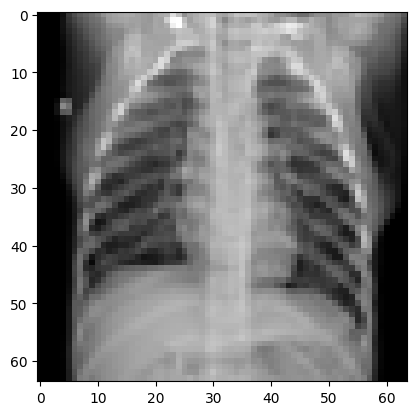

In [3]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import os
index = 600
dataset = 'Alzheimer_MRI'
#dataset = 'chest_xray'
#datasetType = '01PercentDistribution'
#datasetType = '10PercentRandom'
datasetType = 'TestRandom'
#datasetType = ''
directory = '/home/thire399/Documents/School/DC-MasterThesis-2023/Data'
os.chdir(directory)
data = torch.load(f'Proccesed/{dataset}/'+ datasetType +'trainX.pt')
y = torch.load(f'Proccesed/{dataset}/'+ datasetType +'trainY.pt')
print(f'label {y[index]}')
print(data[index].shape)
print(data.shape)
#print(data[index])
plt.imshow(data[0][0], cmap = 'gray')
print('Distribution', y.shape, sum(y))
#print(torch.max(data[0]), torch.min(data[0]))
plt.show()
#from torchvision import models
#import torch.nn as nn
#import torch
#model = models.resnet50(pretrained = False)
#
#model.fc = nn.Linear(in_features = 2048, out_features = 1, bias=True)
#model.fc.add_module('sigmoid', nn.Sigmoid())
#data = data.repeat(1,3,1,1)
#Set = torch.utils.data.TensorDataset(data, y)
#Loader = torch.utils.data.DataLoader(Set,
#                                        batch_size = 10,
#                                        shuffle = True,
#                                        num_workers = 0)
#for i, (dd, yy) in enumerate(Loader):
#    out = model(data.type(torch.float32))
#    out = nn.Sigmoid()(out)
#    break
##out = out.clamp(min = 0)
#
#for i in range(10):
#    print(out[i], yy[i].item())



# Accuracy

In [1]:
import Loop
import importlib
importlib.reload(Loop)
import torch.nn as nn
from torchvision import models
import numpy as np
import Models as M
import gc
import os
import torch
os.chdir('/home/thire399/Documents/School/DC-MasterThesis-2023')
#del model 
gc.collect()
#model = models.alexnet(pretrained = False)
#model.classifier[6] = nn.Linear(in_features=4096, out_features = 1, bias=True)
model = models.resnet50(pretrained = False)
model.fc = nn.Linear(in_features=2048, out_features = 1, bias=True)

#model = M.UNet(enc_chs = (3, 64, 128, 256, 512, 1024)
#               , dec_chs = (1024, 512, 256, 128, 64)
#               , num_class = 1
#               , df = 16384) # binary classification = 1.
batch_size   = 12
#Data parameters
dataSet      = 'Alzheimer_MRI'  
#dataSet      = 'chest_xray'
lst = ['model128z128 FullResNet20230416-121411'
        ,'model128z128 FullResNet20230416-123009'
        ,'model128z128 FullResNet20230416-124439']
F1List = []
for i in lst:
    tempMOdel = f"Data/Loss_{dataSet}/{i}"

    datatype     = ''
    os.makedirs(f'Data/Loss_{dataSet}/test', exist_ok = True)
    costumLabel  = '64x64Full'

    xVal = torch.load('Data/Proccesed/'+ dataSet + '/' + datatype +'ValX.pt')
    yVal = torch.load('Data/Proccesed/'+ dataSet + '/' + datatype +'ValY.pt')

    xVal = xVal.repeat(1, 3, 1, 1)     # only for pretrained model

    tempval_Set = torch.utils.data.TensorDataset(xVal, yVal)
    tempval_Loader = torch.utils.data.DataLoader(tempval_Set,
                                            batch_size = batch_size,
                                            shuffle = True,
                                            num_workers = 0)
    print('TempVal')
    fscore, pred, bestT = Loop.eval_model(model = model
                    , dataset = dataSet
                    , dev = False
                    , val_Loader = tempval_Loader
                    , model_filePath = tempMOdel
                    , size = costumLabel
                    , isPrint = False)
    F1List.append(fscore)
print(fscore)
print(f'Average f1-score: {np.mean(np.asarray(F1List))} for {len(F1List)} runs')
#print('Accuracy on temp ValidationSet: {0}     --> (sum(Prediction = Target))/n_sampels'.format(np.sum([p == t])/t.shape[0]))
if dataSet != 'Alzheimer_MRI':
    xVal = torch.load('Data/Proccesed/'+ dataSet + '/ValX.pt')
    yVal = torch.load('Data/Proccesed/'+ dataSet + '/ValY.pt')

    xVal = xVal.repeat(1, 3, 1, 1)     # only for pretrained model

    val_Set = torch.utils.data.TensorDataset(xVal, yVal)
    val_Loader = torch.utils.data.DataLoader(val_Set,
                                            batch_size = batch_size,
                                            shuffle = True,
                                            num_workers = 0)

    print('Val')
    fscore, pred, _= Loop.eval_model(model = model
                    , dataset = dataSet
                    , dev = False
                    , val_Loader = val_Loader
                    #, model_filePath = tempMOdel
                    , size = costumLabel
                    , threshold = bestT
                    )
    


#print('Accuracy on ValidationSet: {0}     --> (sum(Prediction = Target))/n_sampels'.format(np.sum([p == t])/t.shape[0]))
#printScore('64x6410PercentDistributionResNet20230414-001616')


TempVal
Using:  cuda:0
Model specified.
Using trained model: "Data/Loss_Alzheimer_MRI/model128z128 FullResNet20230416-121411"
Data/Loss_Alzheimer_MRI/model128z128 FullResNet20230416-121411
Best Threshold=0.276710, F-Score=0.928
Precision: 0.9229074889867841
Recall: 0.933184855233853
TempVal
Using:  cuda:0
Model specified.
Using trained model: "Data/Loss_Alzheimer_MRI/model128z128 FullResNet20230416-123009"
Data/Loss_Alzheimer_MRI/model128z128 FullResNet20230416-123009
Best Threshold=0.681485, F-Score=0.944
Precision: 0.9433333333333334
Recall: 0.9454342984409799
TempVal
Using:  cuda:0
Model specified.
Using trained model: "Data/Loss_Alzheimer_MRI/model128z128 FullResNet20230416-124439"
Data/Loss_Alzheimer_MRI/model128z128 FullResNet20230416-124439
Best Threshold=0.400993, F-Score=0.936
Precision: 0.9277899343544858
Recall: 0.9443207126948775
0.935977340372402
Average f1-score: 0.9361225688955576 for 3 runs


In [6]:
for i in range(len(pred)):
    print(f'Prediction: {pred[i]}, Target: {yVal[i]}')

Prediction: 0, Target: 0
Prediction: 0, Target: 1
Prediction: 1, Target: 1
Prediction: 1, Target: 1
Prediction: 0, Target: 1
Prediction: 0, Target: 1
Prediction: 0, Target: 0
Prediction: 0, Target: 0
Prediction: 1, Target: 1
Prediction: 1, Target: 1
Prediction: 0, Target: 0
Prediction: 1, Target: 1
Prediction: 0, Target: 0
Prediction: 1, Target: 1
Prediction: 1, Target: 0
Prediction: 1, Target: 1
Prediction: 0, Target: 0
Prediction: 0, Target: 1
Prediction: 0, Target: 1
Prediction: 1, Target: 0
Prediction: 1, Target: 0
Prediction: 1, Target: 1
Prediction: 1, Target: 1
Prediction: 0, Target: 0
Prediction: 1, Target: 0
Prediction: 0, Target: 1
Prediction: 0, Target: 0
Prediction: 1, Target: 1
Prediction: 1, Target: 1
Prediction: 0, Target: 0
Prediction: 1, Target: 0
Prediction: 1, Target: 1
Prediction: 1, Target: 0
Prediction: 1, Target: 0
Prediction: 1, Target: 0
Prediction: 0, Target: 1
Prediction: 0, Target: 0
Prediction: 1, Target: 0
Prediction: 0, Target: 0
Prediction: 1, Target: 1


In [ ]:
print("128x128 - alex all")
print("f1-score:")
print((0.983+0.981+0.985+0.980+0.981)/5)

print("epochs:")
print((43+39+45+42+36)/5)


print("128x128 - alex all")
print("f1-score:")
print((0.82)/5)

print("epochs:")
print((42)/5)

In [29]:
from carbontracker import parser
dataSet      = 'chest_xray'
directory = '/home/thire399/Documents/School/DC-MasterThesis-2023'
os.chdir(directory)


parser.print_aggregate(log_dir= 'Data/Loss_' + dataSet + '/CarbonLogs')
logs = parser.parse_all_logs(log_dir = 'Data/Loss_' + dataSet + '/CarbonLogs')
first_log = logs[5]
print(f"Output file name: {first_log['output_filename']}")
print(f"Standard file name: {first_log['standard_filename']}")
print(f"Stopped early: {first_log['early_stop']}")
print(f"Measured consumption: {first_log['actual']}")
print(f"Predicted consumption: {first_log['pred']}")
print(f"Measured GPU devices: {first_log['components']['gpu']['devices']}")

The training of models in this work is estimated to use 0.054 kWh of electricity contributing to 0.004 kg of CO2eq. This is equivalent to 0.039 km travelled by car. Measured by carbontracker (https://github.com/lfwa/carbontracker).
Output file name: Data/Loss_chest_xray/CarbonLogs/64x64RandomUNet_17135_2023-04-03T191445Z_carbontracker_output.log
Standard file name: Data/Loss_chest_xray/CarbonLogs/64x64RandomUNet_17135_2023-04-03T191445Z_carbontracker.log
Stopped early: True
Measured consumption: {'epochs': 46, 'duration (s)': 149.0, 'energy (kWh)': 0.00382, 'co2eq (g)': 0.343831, 'equivalents': {'km travelled by car': 0.003198}}
Predicted consumption: {'epochs': 400, 'duration (s)': 1649.0, 'energy (kWh)': 0.038144, 'co2eq (g)': 4.144998, 'equivalents': {'km travelled by car': 0.038558}}
Measured GPU devices: ['NVIDIA GeForce RTX 3070 Laptop GPU']


Simple remake of the distribution coreset selection dataset into a temp validation set and train set.

In [ ]:
import os
import torch
from sklearn.model_selection import train_test_split

dataSet = 'chest_xray'
directory = '/home/thire399/Documents/School/DC-MasterThesis-2023'
os.chdir(directory)
x = torch.load('Data/Proccesed/chest_xray/DistributiontrainXBeforeSplit.pt')
y = torch.load('Data/Proccesed/chest_xray/DistributiontrainYBeforeSplit.pt')
trainX, tempValX, trainY, tempValY = train_test_split(x, y, test_size = 0.2, random_state= 1)
torch.save(trainX, f = 'Data/Proccesed/chest_xray/DistributiontrainX.pt')
torch.save(trainY, f = 'Data/Proccesed/chest_xray/DistributiontrainY.pt')
torch.save(tempValX, f = 'Data/Proccesed/chest_xray/DistributiontempValX.pt')
torch.save(tempValY, f = 'Data/Proccesed/chest_xray/DistributiontempValY.pt')
